# Fundamentals of Data Analysis

## Project 2020

In this project perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

For enhancement, compare simple linear regression to
other types of regression on this data set

### Project Plan

1. Upload the dataset.
2. Import required libaries for the notebook
3. Intial look at the datset, pandas.describe(), distribution of data, np.random.normal
4. scatterplot of the data using seaborn
5. Explore https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 
6. Understand maybe 5 types of regression on this dataset.
7. Research types of regression that might be suitable - idea of curve/line post initial look at dataset.
8. Regression Vids Tutorials for better understanding:
 - https://www.youtube.com/user/zedstatistics
 - https://en.wikipedia.org/wiki/Regression_analysis
 - https://www.statisticshowto.com/probability-and-statistics/regression-analysis/
 - https://www.sciencedirect.com/topics/medicine-and-dentistry/regression-analysis
9. Plots to describe each regression type
10. subplots for comparison
11. tables for comparison


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#style of plot to be used
plt.style.use("ggplot")

In [3]:
#reading in the dataset
df = pd.read_csv('powerproduction.txt')
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
#data types
df.dtypes

speed    float64
power    float64
dtype: object

In [5]:
#summary statistics
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


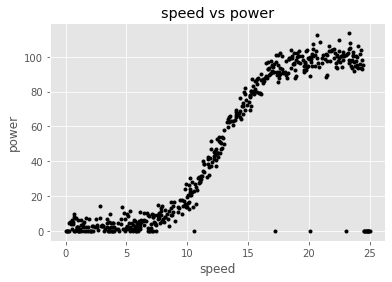

In [6]:
#plotting the dataset
plt.plot(df['speed'],df['power'],'.',color='black')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}');

Looking at the relationship between speed and power we can see that when the speed gets above 10, the power begins to increase sharply but flattens out again once the speed reaches approx 17.5. 

There are also a number of zero values for power when speed is greater than zero. We may view theswe as outliers, incorrect measurements or some anomoly in the data. We will fit a line with and without these values and look at the comparison.

The relationship between speed and power shows a curve or *s shape* pattern. This suggests we should investigate different degrees values when fitting our best fit line.

### Model 1: Simple Linear Regression with Numpy Polyfit all values

$ y = mx + c $

The number $m$ is the slope if the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The $c$ is the y-intercept of the line. It is the value of $y$ when $x$ is at zero.

Using the numpy polyfit function we can identify the coefficents or the $m$ and the $c$. For a staright line we will pass *1* as the degree to create a staright line. Later we will look at applying different degrees to prehaps get a better overall fit.

A simple linear regression estimates the relationship between the values. In the dataset this is speed and power. Performing a linear regression on this dataset we can identify how strong the relationship is between these two variables. Power is *dependent* on Speed *(independent)*. 



In [7]:
#polyfit function, identifiying coeffieients
coeffs= np.polyfit(df['speed'],df['power'],1)

#power and speed values as variable
power = df['power']
speed = df['speed']



#cost ref https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb
cost1 = lambda m,c: np.sum([(power[i] - coeffs[0] * speed[i] - coeffs[1])**2 for i in range(speed.size)])

#### Coefficient of determination

ref https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

The R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is the percentage of the response variable variation that is explained by a linear model. In general the higher the value the better the model fits the data.

The R-squared values range from 0 to 1 and are repesneted by percentages. It really only works  with one explanatory variable.

In [8]:
#calculating R-squared value for the dataset
rsq = np.corrcoef(power,speed)[0][1]**2
print("The R-squared value is %6.4f" % rsq)

The R-squared value is 0.7289


An R-Squared value of .7289 

### Cost Function

ref https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

$$ \sum_i (y_i - mx_i - c)^2 $$

The cost function when applying the coffeficents identified by the polyfit function is the mean of the squared differences between predicted y and actual y (i.e. the residuals). The lower the cost means more accuracy in the model.

In [9]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs[0],coeffs[1], cost1(coeffs[0],coeffs[1])))
cost1 = cost1(coeffs[0],coeffs[1]) 

Cost with m =  4.92 and c = -13.90: 234241.16


#### Fitting the model

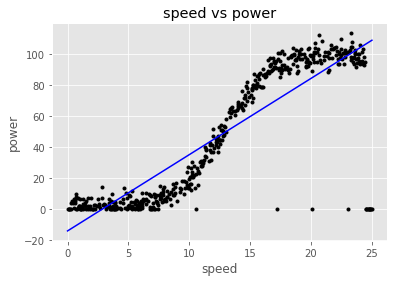

In [10]:
plt.plot(df['speed'],df['power'],'.',color='black')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(df['speed'],coeffs[0] *df['speed'] + coeffs[1],color='blue',label = 'Best Fit line');

#### Discuss model

#### function for prediction

In [11]:
def predict_m1(x):
    return coeffs[0] *+ x + coeffs[1]

#### Example of predictions using model 1

In [12]:
print(predict_m1(0))
print(predict_m1(5))
print(predict_m1(10))
print(predict_m1(15))
print(predict_m1(20))

-13.899902630519595
10.688075696503752
35.276054023527095
59.864032350550445
84.4520106775738


### Model 1: Simple Linear Regression with Numpy Polyfit removing zero values for power

In [13]:
df2 = df[df['power']!=0].reset_index()

In [14]:
#polyfit function, identifiying coeffieients
coeffs2= np.polyfit(df2['speed'],df2['power'],1)

#power and speed values as variable
power2 = df2['power']
speed2 = df2['speed']



#cost ref https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb
cost2 = lambda m,c: np.sum([(power2[i] - coeffs2[0] * speed2[i] - coeffs2[1])**2 for i in range(speed2.size)])

In [15]:
#calculating R-squared value for the dataset
rsq2 = np.corrcoef(power2,speed2)[0][1]**2
print("The R-squared value is %6.4f" % rsq2)

The R-squared value is 0.8985


In [16]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs2[0],coeffs2[1], cost2(coeffs2[0],coeffs2[1])))
cost2 = cost2(coeffs2[0],coeffs2[1]) 

Cost with m =  5.62 and c = -19.84: 75012.39


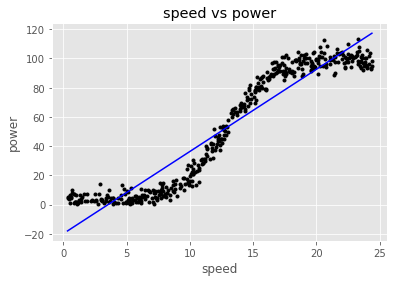

In [17]:
plt.plot(df2['speed'],df2['power'],'.',color='black')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(df2['speed'],coeffs2[0] *df2['speed'] + coeffs2[1],color='blue',label = 'Best Fit line');

In [18]:
def predict_m2(x):
    return coeffs2[0] *+ x + coeffs2[1]

In [19]:
print(predict_m2(0))
print(predict_m2(5))
print(predict_m2(10))
print(predict_m2(15))
print(predict_m2(20))

-19.837685452108364
8.256453736784334
36.350592925677034
64.44473211456973
92.53887130346243


#### Comparision Dataframe of models

We can compare the difference in the R-squared value and cost value between model 1 (all the data) and model 2 (zero values for power removed)

In [20]:
#ref https://stackoverflow.com/questions/16597265/appending-to-an-empty-dataframe-in-pandas
compare_df = pd.DataFrame(columns = ['R-squared', 'Cost'])

In [21]:
compare_df = compare_df.append({'R-squared':rsq,'Cost':cost1,'Model':'Model 1'},ignore_index=True)
compare_df = compare_df.append({'R-squared':rsq2,'Cost':cost2,'Model':'Model 2'},ignore_index=True)

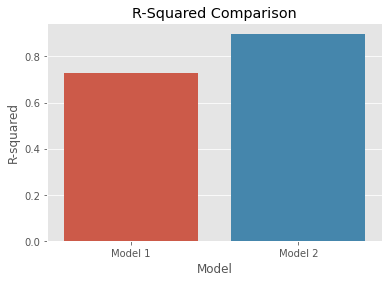

In [22]:
sns.barplot(x='Model',data=compare_df,y='R-squared')
plt.title('R-Squared Comparison');

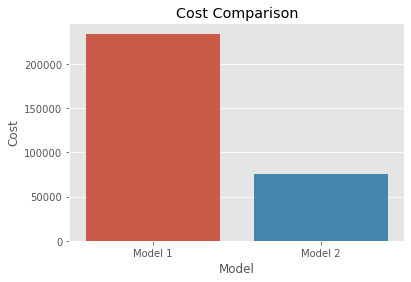

In [23]:
sns.barplot(x='Model',data=compare_df,y='Cost')
plt.title('Cost Comparison');

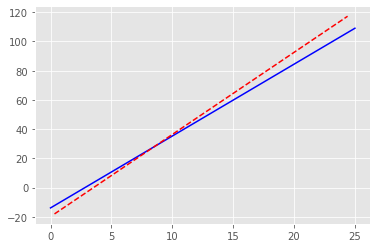

In [30]:
#plt.plot(df['speed'],df['power'],'.',color='black')
#plt.title(f'{df.columns[0]} vs {df.columns[1]}')
#plt.xlabel(f'{df.columns[0]}')
#plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(df['speed'],coeffs[0] *df['speed'] + coeffs[1],color='blue',label = 'Model 1')
plt.plot(df2['speed'],coeffs2[0] *df2['speed'] + coeffs2[1],'--',color='red',label = 'Model 2');